# Predicting Continuous Target Variables With Regression Analysis

## Introducing Linear Regression

The goal of linear regression is to model the relationship between one or multiple features and a continuous target variable. It aims to predict outputs on a continuous scale rather than categorical class labels.

### Simple Linear Regression

The goal of simple (**univariate**) linear regression is to model the relationship between a single feature (**explnatory variable**, x) and a continuous-valued **target**  (**response variable**, y). The equation of a linear model with one explanatory variable is defined as follows:

y = w1x + b

Here, the parameter (bias unit), b, represents the y axis intercept and w1 is the weight coefficient of the explanatory variable. Our goal is to learn the weights of the linear equation to describe the relationship between the explanatory variable and the target variable, which can then be used to predict the responses of new explanatory variables that were not part of the training dataset.

Linear regression can be understood as finding the best-fitting line through the trainign examples

![Alt text](../images/24.png)

The best-fitting line is alose called the **regression line**, and the vertical lines from the regression line to the training examples are the so-called **offsets** or **residuals** - the errors of out predictions

## Ames Housing Dataset

In [2]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [10]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                sep='\t',
                usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [12]:
df.dtypes

Overall Qual       int64
Overall Cond       int64
Total Bsmt SF    float64
Central Air       object
Gr Liv Area        int64
SalePrice          int64
dtype: object

In [13]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [15]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [16]:
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

### Visualizing The Important Characteristics of a Dataset

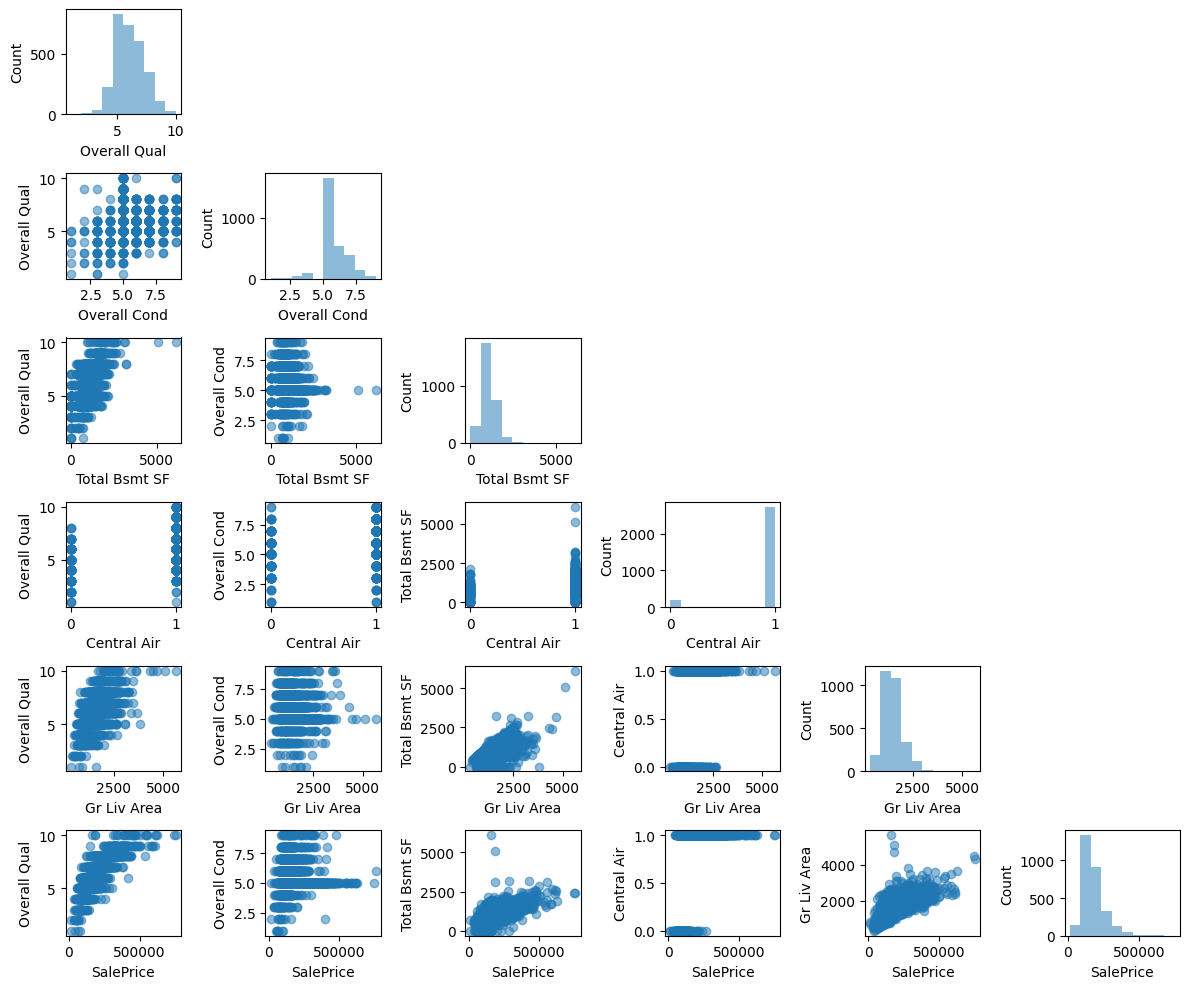

In [17]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values, figsize=(12, 10),
                    names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show() 

### Correlation Matrix

The **Pearson product-moment correlation coefficient** measure the linear dependence between pairs of features. It ranges from -1 to 1.

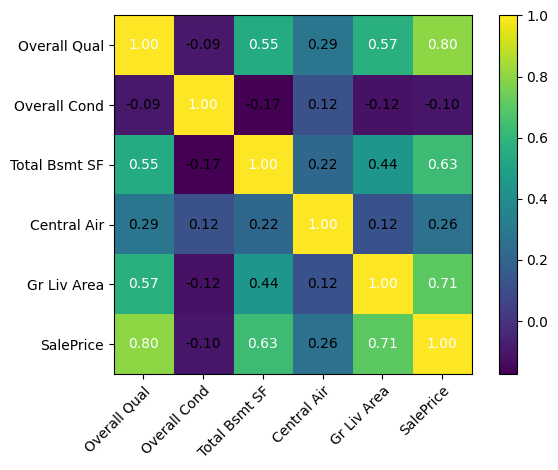

In [18]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show() 

To fit a linear regression model, we are interested in those features that have a high correlation with our target variable, SalePrice. Looking at the previous correlation matrix, we can see that SalePrice shows the largest correlation with the Gr Liv Area variable, which seems to be a good choice for an exploratory variable to introduce the concepts of a simple linear regression moel in the following section.

## Implementing an Ordinary Least Squares Linear Regression Model

### Solving Regression For Regression Parameters With Gradient Descent

In [19]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
    
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return self.net_input(X)

In [20]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

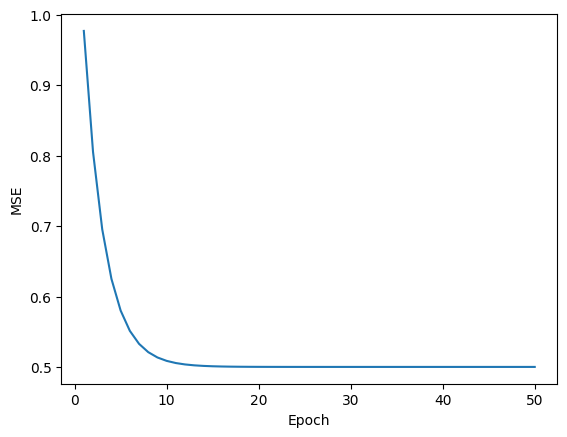

In [21]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

In [22]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

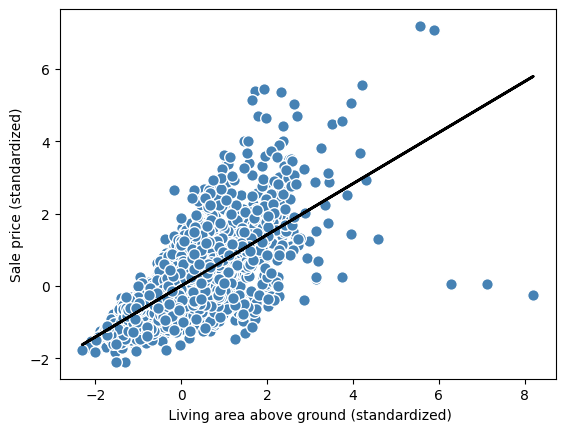

In [23]:
lin_regplot(X_std, y_std, lr)
plt.xlabel(' Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [24]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sales price: ${target_reverted.flatten()[0]:.2f}')

Sales price: $292507.07


In [25]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


### Estimating The Coefficient Of a Regression Model Via Scikit-Learn

In [26]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
Slope: 111.666
print(f'Intercept: {slr.intercept_:.3f}')

Slope: 111.666
Intercept: 13342.979


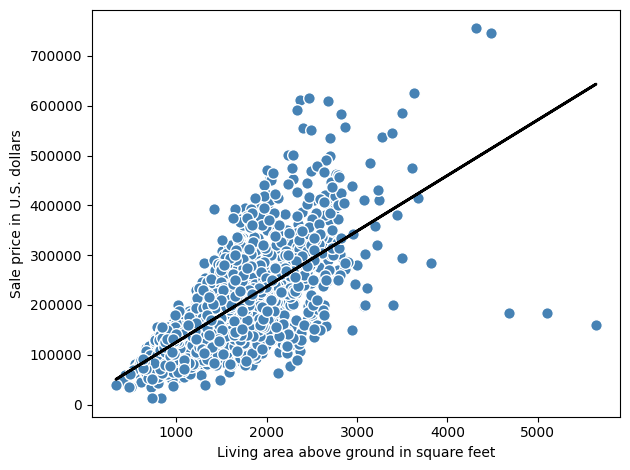

In [27]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.tight_layout()
plt.show()

## Fitting a Robust Regression Model Using RANSAC

Linear regression models can be heavily impacted by the presence of outliers. Sometimes, a very small subset of our data can have a big effect on the estimated model coefficients. As an alternative to throwing out outliers, we'll look at a robust method of regression using the **RANdom SAmplr Consensus (RANSAC)** algorithm, which fits a regression model to a subset of the data, the so-called **inliers**.

We can summarize the iterative RANSAC algorithm as follows:

    1. Select a random number of examples to be inliers and fit the model.

    2. Tell all other data points against the fitted model and add those point that fall within a user-given tolerance to the inliers.
    
    3. Refit the model using all inliers.
    
    4. Estimate the error of the fitted model versus the inliers.
    
    5. Terminate the algorithm if the performance meets a certain user-efined threshold or if 
    a fixed number of iterations was reached, go back to step 1 otherwise.
    

In [28]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(
                LinearRegression(),
                max_trials=100, # default value
                min_samples=0.95,
                residual_threshold=None, # default value
                random_state=123)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

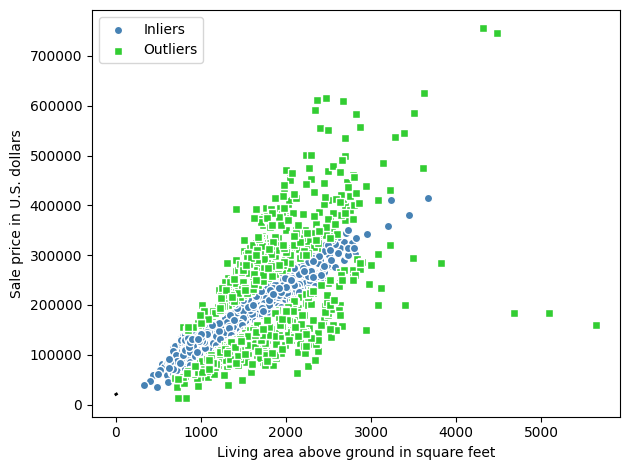

In [29]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


In [31]:
def mean_absolute_deviation(data):
    return np.mean(np.abs(data - np.mean(data)))

mean_absolute_deviation(y)

np.float64(58269.561754979375)

## Evaluating the Performance Of Linear Regression Models

In [32]:
from sklearn.model_selection import train_test_split
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

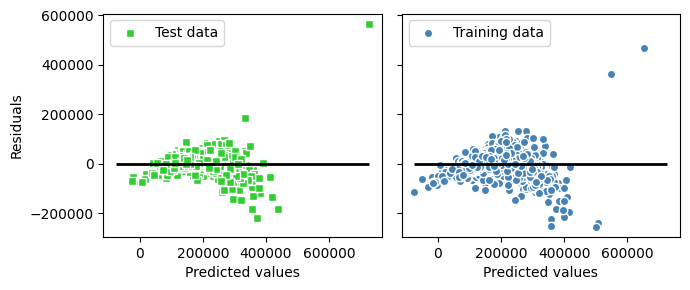

In [33]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(
    y_test_pred, y_test_pred - y_test,
    c='limegreen', marker='s',
    edgecolor='white',
    label='Test data'
    )

ax2.scatter(
    y_train_pred, y_train_pred - y_train,
    c='steelblue', marker='o', edgecolor='white',
    label='Training data'
    )
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


In [35]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 25983.03
MAE test: 24921.29


In [36]:
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'R^2 train: {train_r2:.3f}, {test_r2:.3f}')

R^2 train: 0.769, 0.752


## Adding Polynomial Terms Using Scikit-Learn

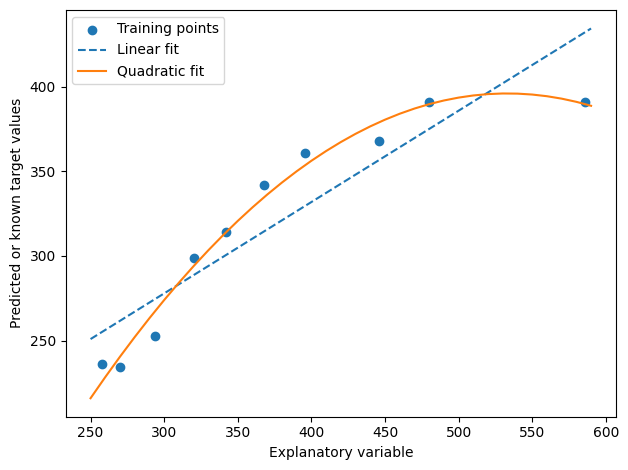

In [37]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,
                368.0, 396.0, 446.0, 480.0, 586.0])\
                [:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,
                342.2, 360.8, 368.0, 391.2, 390.8])

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)

X_quad = quadratic.fit_transform(X)
lr.fit(X, y)

X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)
pr.fit(X_quad, y)

y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit,
label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit,
label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)

print(f'Training MSE linear: {mse_lin:.3f}' f', quadratic: {mse_quad:.3f}')

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)

print(f'Training R^2 linear: {r2_lin:.3f}' f', quadratic: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982
